In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


1. Загрузите агрегированные данные о поездках в мае 2016. Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.

In [3]:
# Задаем границы Нью-Йорка
left_bound=-74.25559
right_bound=-73.70001
hight_bound=40.91553
bottom_bound=40.49612

In [4]:
table=pd.read_csv('table.csv', header=0)#считываем данные из файла

In [5]:
table=table[table.columns[1:]]

In [6]:
table[300:305]

,Day_hour,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
300,2016-05-13 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,2016-05-13 13:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,2016-05-13 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,2016-05-13 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,2016-05-13 16:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Суммируем количества поездок по столбцам зон.
num_trips=[]# Задаем массив
for zone in table.columns[1:]:
    num_trips.append(table[zone].sum())#Заполняем массив
trips_from_zones=pd.DataFrame(np.reshape # Преобразуем массив в формат пандас
                              (num_trips,(1,2500)), columns=table.columns[1:])    

In [8]:
trips_from_zones

,1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
nul_zones=num_trips.count(0) #Считаем количество нулевых зон (откуда не было поездок в мае)

In [10]:
print ('количество зон без поездок в мае равно:', nul_zones )

количество зон без поездок в мае равно: 1283


In [11]:
#Создадим список зон, из которых были поездки
zones_with_trips=[]
for zone in trips_from_zones.columns:
    if trips_from_zones[zone][0]!=0:
        zones_with_trips.append(zone)

In [12]:
len(zones_with_trips)# Проверяем длину массива

1217

In [13]:
print(zones_with_trips[:50])# Посмотрим начало массива зон с поездками

['15', '16', '25', '27', '32', '45', '49', '61', '77', '80', '83', '90', '109', '110', '111', '112', '116', '125', '140', '143', '144', '171', '172', '181', '183', '197', '198', '217', '218', '223', '229', '239', '241', '242', '246', '259', '261', '262', '269', '272', '273', '277', '281', '284', '289', '292', '306', '307', '308', '310']


2. Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.
3. Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.

In [15]:
#Небольшая магия чтоб заработал Basemap
import os
os.environ['PROJ_LIB']=r'C:\Users\rumossema\AppData\Local\Continuum\anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap

In [16]:
# Считываем таблицу районов
boros=pd.read_csv('regions.csv', header=0, sep=';')

In [17]:
y_array=np.array(pd.unique(boros.west)) # Создаем массив границ районов по долготе
x_array=np.array(pd.unique(boros.south))# Создаем массив границ районов по широте
y_array=np.append(y_array, right_bound)# Добавляем крайнюю границу массива разбиения по долготе
x_array=np.append(x_array, hight_bound)# Добавляем крайнюю границу массива разбиения по широте

C:\Users\rumossema\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


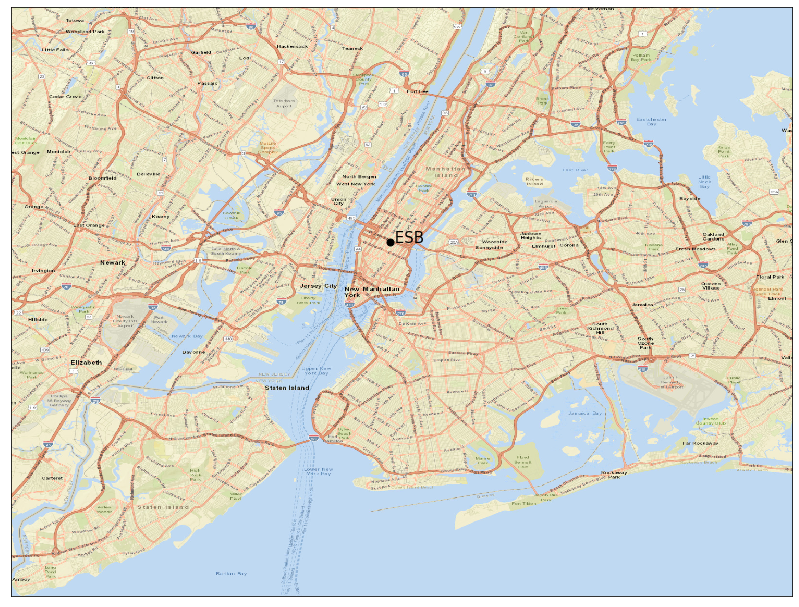

In [18]:
# Строим статическую карту с башней ESB.
fig = plt.figure(figsize=(14, 16), edgecolor='w')
#Применим цилиндрическую проекцию
ms = Basemap(projection='cyl', resolution='h',
            llcrnrlat=bottom_bound, urcrnrlat=hight_bound,
            llcrnrlon=left_bound, urcrnrlon=right_bound, )
# Задаем вид карты
ms.arcgisimage(service='World_Street_Map', xpixels = 1500, verbose= False)
#Рисуем точку Empire State Building (ESB)
x, y = ms(-73.98583, 40.747780)
plt.plot(x, y, 'ok', markersize=7)
plt.text(x, y, ' ESB', fontsize=15)
plt.show()

C:\Users\rumossema\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\rumossema\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


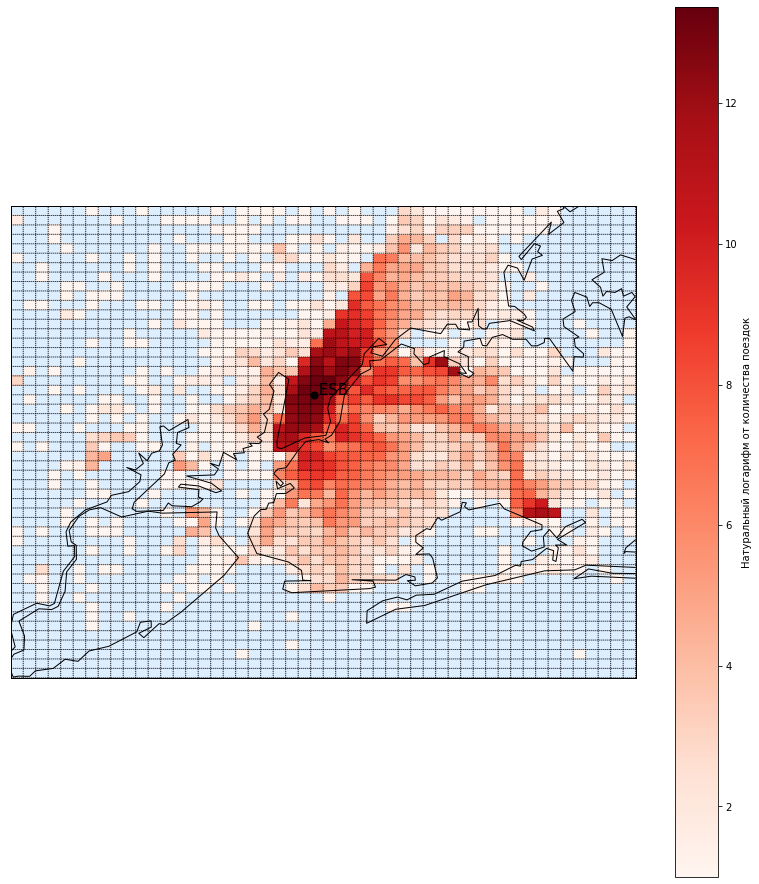

In [19]:
# Строим карту и наносим данные о количествах поездок из зон
fig = plt.figure(figsize=(14, 16), edgecolor='w')
#Применим цилиндрическую проекцию
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat=bottom_bound, urcrnrlat=hight_bound,
            llcrnrlon=left_bound, urcrnrlon=right_bound, )

m.drawmapboundary(fill_color="#DDEEFF")# Наносим границы карты
m.drawcoastlines()# Строим линии побережья
m.drawparallels(x_array)# Рисуем параллели
m.drawmeridians(y_array)# Рисуем меридианы
lon, lat = np.meshgrid(y_array, x_array)# Упорядочиваем сетку районов
#Наносим сетку с закрашиванием, пропорционально натуральному логарифму от количества поездок из района
m.pcolormesh(lon, lat,  np.log(np.array(trips_from_zones.loc[0]).reshape(50,50, order='F')),
             latlon=True, cmap='Reds')
#Задаем параметры колр-бара
plt.clim(1,np.log(trips_from_zones.max(axis=1)))
plt.colorbar(label='Натуральный логарифм от количества поездок')#Выводим шкалу колор-бара
#Рисуем точку Empire State Building (ESB)
x, y = m(-73.98583, 40.747780)
plt.plot(x, y, 'ok', markersize=7)
plt.text(x, y, ' ESB', fontsize=15)
plt.show()

4. Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.
5. Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.

In [21]:
# Импортируем необходимые модули
import folium
import geojson
import json
from geojson import Polygon, Feature, FeatureCollection

In [22]:
#Функция для создания файла geojson из файла районов
def data2geojson(df, name_fail):
    features = []
    insert_features = lambda X: features.append(
            geojson.Feature(geometry=geojson.Polygon([[(X['west'],X['south']), (X['west'],X['north']),
                                                       (X['east'],X['north']), (X['east'], X['south']),
                                                       (X['west'],X['south'])]]),
                            properties=dict(name=X['region'],
                                            description=X['region'])))
    df.apply(insert_features, axis=1)
    with open(name_fail, 'w', encoding='utf8') as fp:
        geojson.dump(geojson.FeatureCollection(features), fp, sort_keys=True, ensure_ascii=False)


In [23]:
data2geojson(boros, name_fail='map1.json')# Преобразуем данные из таблицы районов в гео-данные для рисования сетки районов.

In [24]:
# Считываем геоданные о районах.
with open('map1.json', 'r') as f:
    data_geo = json.loads(f.read())

In [25]:
# Строим динамическую карту и наносим статую свободы.
md = folium.Map(location=[40.747780, -73.98583])#Сама карта
tooltip = 'Click me!' # Задаем тип маркера
folium.Marker([40.689047, -74.044569], popup='<i>Statue of Liberty</i>', tooltip=tooltip).add_to(md) #Добавляем маркер
md

Считаем среднее количество поездок в час

In [26]:
# Для начала копируем таблицу частоты поездок по часам
mean_trips=table[table.columns[1:]].copy(deep=True)

In [27]:
# Считаем среднее количество поездок в час по районам
mean_trips=table[table.columns[1:]].copy(deep=True).mean(axis=0)

In [28]:
mean_trips[1231]

742.611559139785

In [29]:
# Добавляем столбец среднего числа поездок в час в таблицу районов
boros['t_p_h']=np.array(mean_trips)

In [30]:
boros.loc[1220:1240]

,region,west,east,south,north,t_p_h
1220,1221,-73.988912,-73.9778,40.663884,40.672272,5.043011
1221,1222,-73.988912,-73.9778,40.672272,40.680660,9.994624
1222,1223,-73.988912,-73.9778,40.680660,40.689049,16.557796
1223,1224,-73.988912,-73.9778,40.689049,40.697437,25.504032
1224,1225,-73.988912,-73.9778,40.697437,40.705825,5.364247
1225,1226,-73.988912,-73.9778,40.705825,40.714213,3.577957
1226,1227,-73.988912,-73.9778,40.714213,40.722601,162.092742
1227,1228,-73.988912,-73.9778,40.722601,40.730990,317.581989
1228,1229,-73.988912,-73.9778,40.730990,40.739378,420.055108
1229,1230,-73.988912,-73.9778,40.739378,40.747766,639.927419


Рисуем карту, со слоем сетки районов и числом поездок в час из района. Добавляем точку статуи свободы.

In [31]:
#Непосредственно код для рисования
m1 = folium.Map(location=[40.747780, -73.98583])#Сама карта
folium.Choropleth(  # Слой сетки районов
    data_geo,
    data=boros,
    columns=['region', 't_p_h'],
    key_on='properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name='Trips per hour mean',
    highlight=True
).add_to(m1)
tooltip = 'Click me!' # Задаем тип маркера
folium.Marker([40.689047, -74.044569], popup='<i>Statue of Liberty</i>', tooltip=tooltip).add_to(m1) #Добавляем маркер

In [32]:
m1

6. Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.

In [33]:
mean_trips_pd=pd.DataFrame(np.reshape # Преобразуем массив средних чисел поездок в час в формат пандас
                              (np.array(mean_trips),(1,2500)), columns=table.columns[1:])

In [34]:
#Создадим список зон, из которых было в среднем более 5 поездок в час
zones_more_5=[]
for zone in mean_trips_pd.columns:
    if mean_trips_pd[zone][0]>=5:
        zones_more_5.append(int(zone))

In [35]:
# Выведем количество зон с более чем 5 поездками в час
print('Количество зон c более 5 поездками в час:', len(zones_more_5))

Количество зон c более 5 поездками в час: 102


In [77]:
# Запишем список зон с количеством поездок в среднем более 5 в файл для дальнейшего использования
Zones_g.to_csv('regions_more_5', index=False)

Построим карту, где отобразим зоны с более чем 5 поездками в час.

In [36]:
#Отделяем от таблицы районов строки с средним числом поездок больше 5
boros2=boros[boros.region == zones_more_5[0]]
for zone in zones_more_5[1:]:
    boros2=boros2.append(boros[boros.region == zone], ignore_index=True)

In [37]:
boros2.head()

,region,west,east,south,north,t_p_h
0,1075,-74.022246,-74.011135,40.697437,40.705825,66.799731
1,1076,-74.022246,-74.011135,40.705825,40.714213,138.266129
2,1077,-74.022246,-74.011135,40.714213,40.722601,86.802419
3,1125,-74.011135,-74.000023,40.697437,40.705825,66.041667
4,1126,-74.011135,-74.000023,40.705825,40.714213,181.892473


In [80]:
#Запишем эту таблицу. Позже пригодится.
boros2.to_csv('regions_more_5', index=False)

In [38]:
# Создадим файл геоданных этих зон
data2geojson(boros2, name_fail='map2.json')

In [39]:
#Читаем данные из файла и строим карту со слоем зон, со средним числом поездок более 5
with open('map2.json', 'r') as f:
    data_geo_2 = json.loads(f.read())
m2 = folium.Map(location=[40.747780, -73.98583])
folium.GeoJson(data_geo_2).add_to(m2)
folium.LayerControl().add_to(m2)
tooltip = 'Click me!' # Задаем тип маркера
folium.Marker([40.689047, -74.044569], popup='<i>Statue of Liberty</i>', tooltip=tooltip).add_to(m2)
m2

Судя по карте, зон, откуда поездки не возможны, нет.